In [1889]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)

In [1890]:
df_train = pd.read_csv('train.csv', sep=',', encoding='utf8')

In [1891]:
df_test = pd.read_csv('test.csv', sep=',', encoding='utf8')

In [1892]:
df_train.head().T

,0,1,2,3,4
_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,54,36,53,34,29
job,technician,services,blue-collar,blue-collar,services
marital,married,single,married,married,single
education,professional.course,basic.4y,basic.4y,basic.9y,university.degree
default,unknown,no,no,no,no
housing,no,no,yes,yes,yes
loan,no,no,no,yes,no
contact,cellular,telephone,cellular,telephone,telephone
month,aug,may,aug,may,aug


In [1893]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_id,24712,24712,60fc7051b501a4e3ec54b38a3bbad4bf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1894]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [1895]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [1896]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_id,16476,16476,cdf4c9d3edbe58c9211342f81c95abe1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,16476,NaN,NaN,NaN,40.0149,10.3597,17,32,38,47,98
job,16476,12,admin.,4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,16476,4,married,10057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,16476,8,university.degree,4859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,16476,3,no,13021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,16476,3,yes,8642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,16476,3,no,13616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,16476,2,cellular,10415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,16476,10,may,5570,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1897]:
df_train.day_of_week.unique()

array(['tue', 'mon', 'wed', 'fri', 'thu'], dtype=object)

In [1898]:
def preproc_data(df):
    df = df.drop(['_id'], axis=1)
    df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week'])
    #df.loc[:,  'month'] = df.loc[:,  'month'].replace({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
    #df.loc[:,  'day_of_week'] = df.loc[:,  'day_of_week'].replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
    
    return df

def preproc_data_test(df):
    df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day_of_week'])
    #df.loc[:,  'month'] = df.loc[:,  'month'].replace({'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
    #df.loc[:,  'day_of_week'] = df.loc[:,  'day_of_week'].replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5})
    
    return df

In [1899]:
df_train = df_train.pipe(preproc_data)

In [1900]:
df_train.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,54.000,36.000,53.000,34.000,29.000,56.000,33.000,36.00,70.000,32.000,48.000,34.000,29.000,38.000,29.000
duration,87.000,291.000,182.000,180.000,6.000,64.000,312.000,20.00,585.000,196.000,230.000,210.000,161.000,163.000,758.000
campaign,1.000,1.000,1.000,2.000,1.000,2.000,2.000,1.00,1.000,2.000,2.000,2.000,2.000,3.000,2.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.00,6.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.00,3.000,1.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.400,1.100,1.400,1.100,-1.700,1.400,-1.800,-0.10,-1.100,-1.800,1.100,1.100,-2.900,1.100,-1.800
cons.price.idx,93.444,93.994,93.444,93.994,94.027,94.465,93.876,93.20,94.601,92.893,93.994,93.994,92.963,93.994,93.075
cons.conf.idx,-36.100,-36.400,-36.100,-36.400,-38.300,-41.800,-40.000,-42.00,-49.500,-46.200,-36.400,-36.400,-40.800,-36.400,-47.100
euribor3m,4.963,4.857,4.965,4.857,0.890,4.961,0.685,4.12,0.987,1.327,4.855,4.858,1.252,4.859,1.405
nr.employed,5228.100,5191.000,5228.100,5191.000,4991.600,5228.100,5008.700,5195.80,4963.600,5099.100,5191.000,5191.000,5076.200,5191.000,5099.100


In [1901]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,24712.0,40.030188,10.462301,17.000,32.000,38.000,47.000,98.000
duration,24712.0,258.345298,261.573344,0.000,102.000,180.000,319.000,4918.000
campaign,24712.0,2.580163,2.776757,1.000,1.000,2.000,3.000,43.000
pdays,24712.0,963.558797,184.224885,0.000,999.000,999.000,999.000,999.000
previous,24712.0,0.171900,0.491511,0.000,0.000,0.000,0.000,6.000
emp.var.rate,24712.0,0.082713,1.572300,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,24712.0,93.576386,0.579548,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,24712.0,-40.516077,4.639359,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,24712.0,3.619397,1.737099,0.634,1.344,4.857,4.961,5.045
nr.employed,24712.0,5166.988111,72.516221,4963.600,5099.100,5191.000,5228.100,5228.100


In [1902]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 64 columns):
age                              24712 non-null int64
duration                         24712 non-null int64
campaign                         24712 non-null int64
pdays                            24712 non-null int64
previous                         24712 non-null int64
emp.var.rate                     24712 non-null float64
cons.price.idx                   24712 non-null float64
cons.conf.idx                    24712 non-null float64
euribor3m                        24712 non-null float64
nr.employed                      24712 non-null float64
target                           24712 non-null int64
job_admin.                       24712 non-null uint8
job_blue-collar                  24712 non-null uint8
job_entrepreneur                 24712 non-null uint8
job_housemaid                    24712 non-null uint8
job_management                   24712 non-null uint8
job_retired      

In [1903]:
# f, ax = plt.subplots(figsize = (21, 21))
# sns.heatmap(df_train.corr(), ax = ax, annot=True)

In [1904]:
# df_train.hist(column='month', figsize=(10, 5));
# df_train[df_train.target == 0].hist(column='month', figsize=(10, 5));
# df_train[df_train.target == 1].hist(column='month', figsize=(10, 5));

#сильная зависимость от месяца

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(2567, 64)

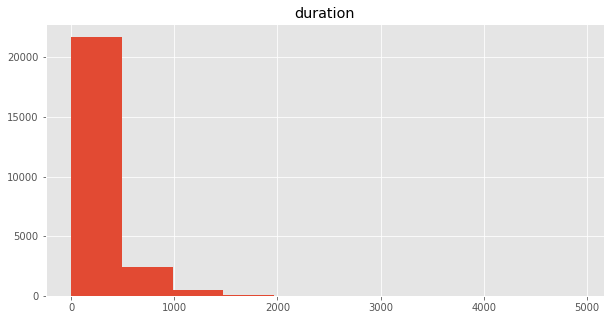

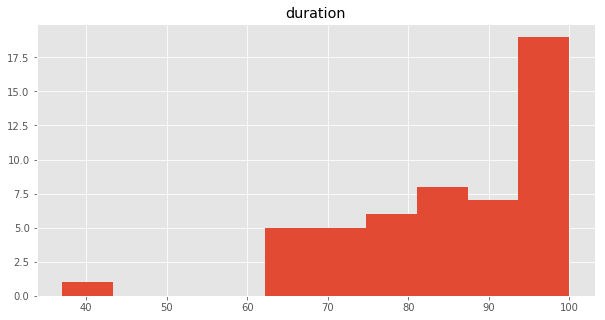

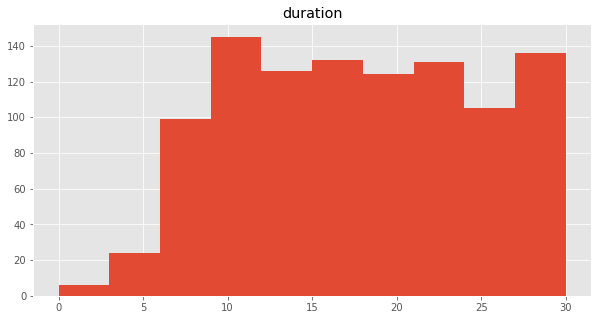

In [1905]:
df_train.hist(column='duration', figsize=(10, 5));
df_train[df_train.duration <= 100][df_train.target == 1].hist(column='duration', figsize=(10, 5));
df_train[df_train.duration <= 30][df_train.target == 0].hist(column='duration', figsize=(10, 5));
df_train[df_train.duration <= 60].shape

df_train1 = df_train[df_train.target == 1]
for i in range(0, 16):
    df_train = df_train.append(df_train1)
#df_train = df_train[df_train.duration > 60]

In [1906]:
y = df_train.target
X = df_train.drop(['target'], axis=1)

In [1907]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [1908]:
knn = Pipeline([
    ('k', KNeighborsClassifier())
])

dtc = Pipeline([
    ('scaler', StandardScaler()),
    ('d', DecisionTreeClassifier())
])

lr = Pipeline([
    ('onehot', OneHotEncoder(categorical_features=[])),
    ('scaler', StandardScaler()),
    ('l', LogisticRegression())
])

knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test1)
predict_knn_proba = knn.predict_proba(X_test1)

dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test1)
predict_dtc_proba = dtc.predict_proba(X_test1)

lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test1)
predict_lr_proba = lr.predict_proba(X_test1)

ROC AUC для модели KNN:  0.8578531977244737
thresholds для модели KNN:  [2.  1.  0.8 0.6 0.4 0.2 0. ]
ROC AUC для модели DTC:  0.7158330777821326
thresholds для модели DTC:  [2. 1. 0.]
ROC AUC для модели LR:  0.933268338600148
thresholds для модели LR:  [9.99621622e-01 9.99505768e-01 9.99285736e-01 9.98984592e-01
 9.98815941e-01 9.95760155e-01 9.88267813e-01 9.87966084e-01
 9.87090651e-01 9.84673651e-01 9.82887041e-01 9.80827281e-01
 9.78575590e-01 9.75852827e-01 9.74861653e-01 9.74144888e-01
 9.70460095e-01 9.68321196e-01 9.68045234e-01 9.66284081e-01
 9.65365133e-01 9.64838424e-01 9.59765867e-01 9.56005177e-01
 9.54704614e-01 9.50836966e-01 9.29008670e-01 9.19861474e-01
 9.17236331e-01 9.16295460e-01 9.08272140e-01 9.05413519e-01
 9.01873316e-01 8.87684275e-01 8.86935512e-01 8.84820683e-01
 8.80951200e-01 8.80073778e-01 8.76378003e-01 8.71657745e-01
 8.71017539e-01 8.69716319e-01 8.66940519e-01 8.64947968e-01
 8.63553095e-01 8.63331379e-01 8.61225021e-01 8.60908499e-01
 8.60650859e-0

(-0.01, 1.01)

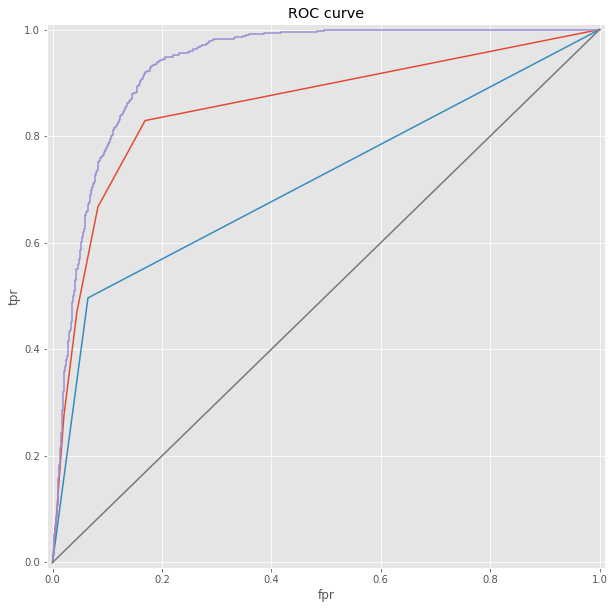

In [1909]:
fpr, tpr, thresholds = roc_curve(y_test1, predict_knn_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели KNN: ', roc_auc_score(y_test1, predict_knn_proba[:,1]))
print('thresholds для модели KNN: ', thresholds)

fpr, tpr, thresholds = roc_curve(y_test1, predict_dtc_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели DTC: ', roc_auc_score(y_test1, predict_dtc_proba[:,1]))
print('thresholds для модели DTC: ', thresholds)

fpr, tpr, thresholds = roc_curve(y_test1, predict_lr_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели LR: ', roc_auc_score(y_test1, predict_lr_proba[:,1]))
print('thresholds для модели LR: ', thresholds)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

dtc = Pipeline([
    ('scaler', StandardScaler()),
    ('d', DecisionTreeClassifier())
])

dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_test1)
predict_dtc_proba = dtc.predict_proba(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, predict_dtc_proba[:,1])
plt.plot(fpr, tpr)
print('ROC AUC для модели DTC: ', roc_auc_score(y_test1, predict_dtc_proba[:,1]))

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
cross_val_score(knn, X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

cross_val_score(dtc, X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

cross_val_score(lr, X, y, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123).split(X, y))

In [1910]:
df_testtemp = df_test
df_testtemp = df_testtemp.pipe(preproc_data)

In [1911]:
predict_knn_proba1 = knn.predict_proba(df_testtemp)
predict_dtc_proba1 = dtc.predict_proba(df_testtemp)
predict_lr_proba1 = lr.predict_proba(df_testtemp)
df_test['target'] = predict_lr_proba1[:, 1]

In [1912]:
predict_knn_proba1[:, 1].sort()
predict_dtc_proba1[:, 1].sort()
predict_lr_proba1[:, 1].sort()

0.11025734401553777
0.1164117504248604
0.11338750358873559


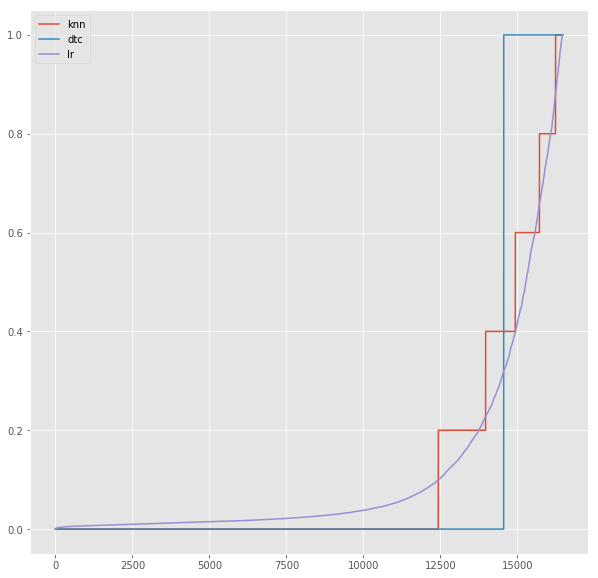

In [1913]:
plt.plot(range(0,16476), predict_knn_proba1[:, 1], label='knn')
plt.plot(range(0,16476), predict_dtc_proba1[:, 1], label='dtc')
plt.plot(range(0,16476), predict_lr_proba1[:, 1], label='lr')
plt.legend()
print(predict_knn_proba1[:, 1].mean())
print(predict_dtc_proba1[:, 1].mean())
print(predict_lr_proba1[:, 1].mean())

In [1914]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0.058406
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0.010719
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0.014410
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0.044803
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0.018467


In [1915]:
df_test.to_csv('submit1.csv', sep=',')